# Workshop 3: Cleaning, Manipulating, and Exploring Data with Pandas
[Placeholder for intro materials]

Notes:

- Take out combining datasets?
- No renaming columns?
- write an example for dropna()
- Add in an apply() function
- Line chart
- Altair?

In [3]:
# Import the Pandas library as pd (callable in our code as pd)
import pandas as pd

In [4]:
# Import the dataset as a DataFrame

# The file location
csv_file_url = 'https://raw.githubusercontent.com/NCSU-Libraries/data-viz-instruction/main/MI_REU_2021/data/perovskite_DFT_EaH_FormE.csv'

# Read in the file and print out the DataFrame
ts_csv = pd.read_csv(csv_file_url)
ts_csv.head()

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Empty,Empty.1,Empty.2,Empty.3,Empty.4,energy_above_hull (meV/atom),formation_energy (eV/atom)
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,29.747707,-2.113335
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,106.702335,-1.311863
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,171.608093,-1.435607
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,284.898190,-0.868639
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN,270.007913,-1.746806


## Removing data
### Drop columns
We can reduce the size of our dataset by removing unnecessary columns of data using the DataFrame `drop()` method.

In [5]:
# Remove the empty columns using "drop()""
ts_csv_clean = ts_csv.drop(columns=["Empty", "Empty.1", "Empty.2", "Empty.3", "Empty.4"])

# Print out the first five records of the DataFrame
ts_csv_clean.head()

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,energy_above_hull (meV/atom),formation_energy (eV/atom)
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,29.747707,-2.113335
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,106.702335,-1.311863
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,171.608093,-1.435607
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,284.898190,-0.868639
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,270.007913,-1.746806


### Remove NaN

In [6]:
print(ts_csv_clean.shape)

ts_csv_clean.dropna(how='all')
ts_csv_clean.shape

(1929, 10)


(1929, 10)

## Calculating new data
### Calculating with Expressions
We may want to add a new column that is calculated based on other columns. In this example, we create a new column (`Number of elements`) that tells us the number of elements over all of the sites.

We will create a list of all of the columns that we want to include, then create a new column called `Number of elements` that uses `.count()` to count the number of values included in those columns.

In [7]:
# Create a new column for the number of elements found
elements_columns = ['A site #1', 'A site #2','A site #3', 'B site #1', 'B site #2', 'B site #3', 'X site']
ts_csv_clean['Number of elements'] = ts_csv_clean[elements_columns].count(axis='columns')

# Print out the new column
ts_csv_clean[['A site #1', 'A site #2','A site #3', 'B site #1', 'B site #2', 'B site #3', 'X site', 'Number of elements']]

,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,Number of elements
0,Ba,Sr,NaN,V,NaN,NaN,O,4
1,Ba,Bi,Pr,Co,NaN,NaN,O,5
2,Ba,Ca,NaN,Fe,NaN,NaN,O,4
3,Ba,Cd,Pr,Ni,NaN,NaN,O,5
4,Ba,Dy,NaN,Fe,NaN,NaN,O,4
...,...,...,...,...,...,...,...,...
1924,Y,NaN,NaN,V,Co,NaN,O,4
1925,Y,NaN,NaN,V,Cr,NaN,O,4
1926,Y,NaN,NaN,V,Fe,NaN,O,4
1927,Y,NaN,NaN,V,Ni,NaN,O,4


### Calculating with apply functions
Sometimes you need to create a new column based on more complex manipulation of existing data. In this example, we use the `apply()` method to apply a function along the rows in the column... [fill in with example]

In [29]:
def is_stable(energy_above_hull):
    # less than 40meV/atom is stable, greater than 40meV/atom unstable
    if energy_above_hull > 40:
        rounded_eah = round(energy_above_hull, 2)
        return rounded_eah
    else:
        return "Unstable"

ts_csv_clean['stability'] = ts_csv_clean["energy_above_hull (meV/atom)"].apply(is_stable)

ts_csv_clean

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,energy_above_hull (meV/atom),formation_energy (eV/atom),Number of elements,stability
0,Ba1Sr7V8O24,Ba,Sr,NaN,V,NaN,NaN,O,29.747707,-2.113335,4,Unstable
1,Ba2Bi2Pr4Co8O24,Ba,Bi,Pr,Co,NaN,NaN,O,106.702335,-1.311863,5,106.7
2,Ba2Ca6Fe8O24,Ba,Ca,NaN,Fe,NaN,NaN,O,171.608093,-1.435607,4,171.61
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,284.898190,-0.868639,5,284.9
4,Ba2Dy6Fe8O24,Ba,Dy,NaN,Fe,NaN,NaN,O,270.007913,-1.746806,4,270.01
...,...,...,...,...,...,...,...,...,...,...,...,...
1924,Y8V7Co1O24,Y,NaN,NaN,V,Co,NaN,O,1.588513,-2.438274,4,Unstable
1925,Y8V7Cr1O24,Y,NaN,NaN,V,Cr,NaN,O,0.000000,-2.509888,4,Unstable
1926,Y8V7Fe1O24,Y,NaN,NaN,V,Fe,NaN,O,0.000000,-2.479151,4,Unstable
1927,Y8V7Ni1O24,Y,NaN,NaN,V,Ni,NaN,O,0.000000,-2.441538,4,Unstable


## Replacing data
We can replace values in a column based on conditions, similar to "find and replace." In this example, we change two element abbreviations to their full names in the `A site #2` column.

In [9]:
# Replace 'Sr' and 'Ca' abbreviations with "Strontium" and "Calcium"
ts_csv_clean['A site #2'].replace({'Sr': 'Strontium', 'Ca': 'Calcium'}, inplace=True)

# Print out the updated column of data
ts_csv_clean['A site #2'].head()

0    Strontium
1           Bi
2      Calcium
3           Cd
4           Dy
Name: A site #2, dtype: object

In [10]:
#Change the element names back to their abbreviations
ts_csv_clean['A site #2'].replace({'Strontium': 'Sr', 'Calcium': 'Ca'}, inplace=True)

ts_csv_clean['A site #2'].head()

0    Sr
1    Bi
2    Ca
3    Cd
4    Dy
Name: A site #2, dtype: object

## Filtering data
### Conditional filtering
We can filter our data using conditional statements. This can help us remove unecessary rows of data or observe a specific range of data.

In [11]:
# Filter the data to only see perovskite oxides where Calcium was found at A site #1
calcium = ts_csv_clean[ts_csv_clean['A site #1'] == 'Ca']

# Print out the filtered data
calcium

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,energy_above_hull (meV/atom),formation_energy (eV/atom),Number of elements
485,Ca2La6Co8O24,Ca,La,NaN,Co,NaN,NaN,O,50.025452,-1.693684,4
486,Ca2La6Cr8O24,Ca,La,NaN,Cr,NaN,NaN,O,0.000000,-2.297925,4
487,Ca2La6Fe8O24,Ca,La,NaN,Fe,NaN,NaN,O,0.000000,-2.034384,4
488,Ca2La6Ga8O24,Ca,La,NaN,Ga,NaN,NaN,O,73.974147,-2.173541,4
489,Ca2La6Mn8O24,Ca,La,NaN,Mn,NaN,NaN,O,32.789931,-2.086983,4
...,...,...,...,...,...,...,...,...,...,...,...
616,Ca8Ni6Co2O24,Ca,NaN,NaN,Ni,Co,NaN,O,361.579777,-0.866839,4
617,Ca8Ni7Co1O24,Ca,NaN,NaN,Ni,Co,NaN,O,378.453371,-0.824937,4
618,Ca8Ni8O24,Ca,NaN,NaN,Ni,NaN,NaN,O,397.239965,-0.781123,3
619,Ca8Ti8O24,Ca,NaN,NaN,Ti,NaN,NaN,O,12.448077,-2.774067,3


In [12]:
# Filter the data to only see only perovskite oxides with a formation energy greater than -1
high_fe = ts_csv_clean[ts_csv_clean['formation_energy (eV/atom)'] > -1]

# Print out the filtered data
high_fe

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,energy_above_hull (meV/atom),formation_energy (eV/atom),Number of elements
3,Ba2Cd2Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,284.898190,-0.868639,5
41,Ba2Sr6Ni8O24,Ba,Sr,NaN,Ni,NaN,NaN,O,258.828051,-0.801693,4
54,Ba3Cd1Pr4Ni8O24,Ba,Cd,Pr,Ni,NaN,NaN,O,257.075963,-0.967393,5
59,Ba4Ba4Mn2Fe6O24,Ba,Ba,NaN,Mn,Fe,NaN,O,271.906598,-0.931270,5
62,Ba4Ca4Co4Ni4O24,Ba,Ca,NaN,Co,Ni,NaN,O,296.095913,-0.941304,5
...,...,...,...,...,...,...,...,...,...,...,...
1561,Sr8Fe1Ni7O24,Sr,NaN,NaN,Fe,Ni,NaN,O,243.428371,-0.908675,4
1597,Sr8Ni6Co2O24,Sr,NaN,NaN,Ni,Co,NaN,O,241.664953,-0.906028,4
1598,Sr8Ni7Co1O24,Sr,NaN,NaN,Ni,Co,NaN,O,252.767162,-0.864348,4
1599,Sr8Ni8O24,Sr,NaN,NaN,Ni,NaN,NaN,O,263.543371,-0.822993,3


In [13]:
# Filter the data to only see perovskite oxides where Calcium was found at A site #1 
# that also have a formation energy greater than -1
calcium_fe = ts_csv_clean[(ts_csv_clean['A site #1'] == 'Ca') & (ts_csv_clean['formation_energy (eV/atom)'] > -1)]

# Print out the filtered data
calcium_fe

,Material Composition,A site #1,A site #2,A site #3,B site #1,B site #2,B site #3,X site,energy_above_hull (meV/atom),formation_energy (eV/atom),Number of elements
512,Ca4Ba4Co4Ni4O24,Ca,Ba,NaN,Co,Ni,NaN,O,292.390663,-0.945009,5
516,Ca4Ba4Fe1Ni7O24,Ca,Ba,NaN,Fe,Ni,NaN,O,323.822637,-0.826354,5
518,Ca4Ba4Fe2Ni6O24,Ca,Ba,NaN,Fe,Ni,NaN,O,309.856621,-0.910077,5
520,Ca4Ba4Mn1Ni7O24,Ca,Ba,NaN,Mn,Ni,NaN,O,340.437655,-0.833147,5
522,Ca4Ba4Mn2Fe6O24,Ca,Ba,NaN,Mn,Fe,NaN,O,956.831956,-0.666962,5
523,Ca4Ba4Mn2Ni6O24,Ca,Ba,NaN,Mn,Ni,NaN,O,318.399908,-0.948350,5
532,Ca4Ba4Ni4Co4O24,Ca,Ba,NaN,Ni,Co,NaN,O,294.310413,-0.943089,5
533,Ca4Ba4Ni6Co2O24,Ca,Ba,NaN,Ni,Co,NaN,O,357.145351,-0.830199,5
534,Ca4Ba4Ni7Co1O24,Ca,Ba,NaN,Ni,Co,NaN,O,351.817502,-0.782065,5
557,Ca4Sr4Fe1Ni7O24,Ca,Sr,NaN,Fe,Ni,NaN,O,313.927543,-0.884090,5


## Aggregating data
### Unique
It may be interesting to see the total number of unique elements that are recorded in our dataset at a certain site. We can use the `unique()` method on the `B site #3` column to create an array of unique elements. 

The length of this array will provide the number of unique elements found at that site.

In [14]:
# Create a list of the unique elements sounds at B site #3 with unique()
B3_elements = ts_csv_clean['B site #3'].unique()

# Print out the unique species
B3_elements

array([nan, 'Hf', 'Co', 'Fe', 'Cu', 'Mo', 'Ni', 'W'], dtype=object)

In [15]:
# Get the length of the new array (How many unique elements are there?)
len(B3_elements)

8

### Value counts
Value counts show how many instances there are of each unique entry in a column. Here, we are interested in seeing how many of each type of element there are at A site #2.

We will specify the `A site #2` column in our dataset and call the method `value_counts()`. This will return a Series with an index label of each unique element and a value corresponding to the count of that element in the `A site #2` column.

In [16]:
# Count the occurance of unique values on the column 'A site #2'
A2_elements = ts_csv_clean['A site #2'].value_counts()

A2_elements

Sr    162
Zn    144
Ca    143
Y     132
Ba    117
Pr    104
La     74
Ho     61
Sm     45
Gd     44
Dy     43
Nd     42
Sn     14
Cd     14
Bi     11
Mg      7
Ce      3
Er      1
Name: A site #2, dtype: int64

### Minimum, maximum, average
We can also calculate aggregates like the minimum, maximum, and mean of values in a DataFrame or Series. Here are a few examples:

- `mean()` to find the average of a range
- `min()` to find the smallest value
- `max()` to find the largest value
- `sum()` to sum the values of a range

In [17]:
# Calculate the minimum values for each column
ts_csv_clean.min()

Material Composition            Ba1Sr7V8O24
A site #1                                Ba
B site #1                                Al
X site                                    O
energy_above_hull (meV/atom)              0
formation_energy (eV/atom)          -3.2085
Number of elements                        3
dtype: object

In [18]:
# Calculate the average height for energy above hull
ts_csv_clean['energy_above_hull (meV/atom)'].mean()

105.53263270409896

We can use the `agg()` method to call multiple aggregate functions at once.

In [19]:
# Calculate the minimum, maximum, and average hour for energy above hull
ts_csv_clean['energy_above_hull (meV/atom)'].agg(['min', 'max', 'mean'])

min       0.000000
max     956.831956
mean    105.532633
Name: energy_above_hull (meV/atom), dtype: float64

## Grouping data
We may be interested in seeing our data in groups. For example, what does the data look like if we group by the element found at A site #1? How many of each element are found?

We can do this by calling `groupby()` on our dataset and passing in the column we would like to group by. We will group our data by the column `A site #1`, find the count or `size()` of each column in the grouped data, then sort the data from smallest to largest.

In [20]:
# Group the dataset by "A site #1"
by_Asite1 = ts_csv_clean.groupby('A site #1')

# This creates a groupby object that contains information about the groups
print(type(by_Asite1))

# Find the size, or counts, of the grouped data
by_Asite1 = by_Asite1.size()

by_Asite1.sort_values()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


A site #1
Cd      1
Ho      1
Mg      1
Sn      1
Bi      4
Dy     19
Gd     19
Nd     19
Sm     19
Ca    136
Y     258
Sr    302
Pr    330
La    338
Ba    481
dtype: int64

You can also use `groupby()` group data by multiple factors. Here we are grouping by `A site #1` and then `A site #2` to see the averages for different elements in those two sites.

In [21]:
# Group the data by A site #1 and then A site #2 and get the mean of the remaining columns using .mean()
ts_csv_clean.groupby(['A site #1', 'A site #2']).mean()

energy_above_hull (meV/atom)  formation_energy (eV/atom)  \
A site #1 A site #2                                                             
Ba        Ba                           271.906598                   -0.931270   
          Bi                           105.932321                   -1.616462   
          Ca                           239.308297                   -1.182568   
          Cd                           142.473483                   -1.680978   
          Ce                           108.880760                   -1.700416   
...                                           ...                         ...   
Y         Ba                           275.239004                   -1.395605   
          Ca                           221.246470                   -1.484484   
          Ho                            47.305564                   -2.348126   
          Sr                           170.047628                   -1.515276   
          Zn                           121.133217                   -1.864187   

                     Number of elements  
A site #1 A site #2                      
Ba        Ba                   5.000000  
          Bi                   4.727273  
          Ca                   4.846154  
          Cd                   5.000000  
          Ce                   4.000000  
...                                 ...  
Y         Ba                   5.000000  
          Ca                   5.000000  
          Ho                   4.000000  
          Sr                   5.000000  
          Zn                   4.714286  

[69 rows x 3 columns]

## Data Visualization
We can use Pandas to data to create visualizations, like bar charts and line graphs. We will start by using the [matplotlib visualization library](https://matplotlib.org/index.html) to create charts.

Import the [pyplot interface](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) as `plt` to access the plotting functionality of matplotlib.

For all of our charts we will use the matplotlib integration with pandas data structures by calling the method [`plot()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) on a DataFrame or Series.

In [30]:
# Import the matplotlib pyplot interface as plt (callable in our code as plt)
from matplotlib import pyplot as plt

### Create a Bar Chart

We want to visualize the number of different elements found at A site #1. We will aggregate the `A site #1` column using the `value_counts()` method.

In [34]:
# Get the number of strike records for each species type using "SPECIES_GENERALIZE"
A_site = ts_csv_clean['A site #1'].value_counts()

# Print the first 10 values
A_site.head(10)

Ba    481
La    338
Pr    330
Sr    302
Y     258
Ca    136
Dy     19
Gd     19
Sm     19
Nd     19
Name: A site #1, dtype: int64

Now that the data is formatted, we can create a [bar graph](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html) to show each element found and how many instances there were.

We create a bar plot of the values in `A site #1` by calling the `plot()` method with the keyword argument `kind='bar'`.

<AxesSubplot:>

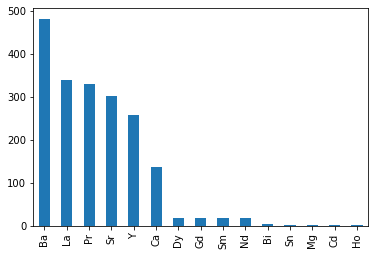

In [35]:
# Ccreate a bar chart ("bar") with the labels (species name) along the horizontal
# axis and value counts (number of records) along the vertical axis
A_site.plot(kind='bar')

<AxesSubplot:>

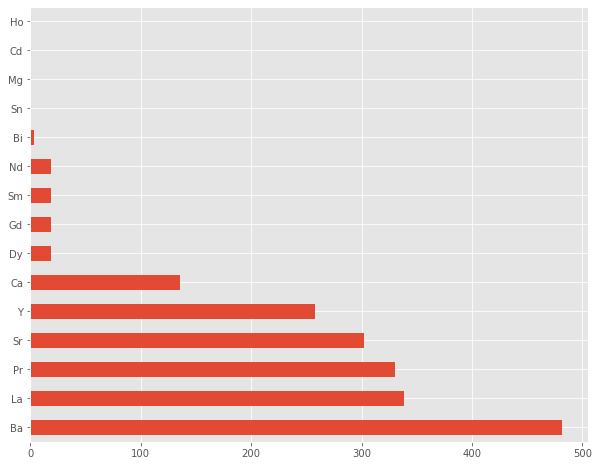

In [41]:
# Now create a horizontal bar chart ("barh") with the labels (species name) along 
# the vertical axis and value counts (number of records) along the horizontal axis
A_site.plot(kind='barh')

#### Setting global chart styles

We can set some basic graphic global paramenters for our plots–the overall [style of the plots and the size of the plots](https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html).

You can view examples of various styles in the [Matplotlib Style Gallery](https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html).

In [38]:
# Set the default size of the plots to 10 inches wide and 8 inches tall
plt.rcParams['figure.figsize'] = [10,8]

In [40]:
# Set the default graphic style of the plots
# See more styles in the "Matplotlib Style Gallery", here we will change the
# style to 'ggplot'
plt.style.use('ggplot')

### Create a Line Graph

We want to show...

We will first calculate the `value_counts()` of the `INCIDENT_YEAR` column

In [ ]:
# Get the number of strikes that occurred in each year using value_counts()
by_year = wl_strikes['INCIDENT_YEAR'].value_counts()

# Print out the strikes per year series
by_year

We then sort the values based on the index, the year of occurrence, so that our data is sorted by year and not value counts.

In [ ]:
# Sort the new Series by the index values, the year
by_year = by_year.sort_index()

# Print out the sorted strikes per year series
by_year

We will use the matplotlib "line" plot type to create a [line chart](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html) that shows the change in total strikes per year over the year range of our dataset.

To create the line plot we call the `plot()` method on the `strikes_per_year` Series and pass in the keyword arguments `kind='line`.

In [ ]:
# Plot the total strikes per year
by_year.plot(kind='line')

### Set the style of the plot

We can manipulate the graphical encoding of our plot data using the keyword argument `style`. For example, the style arguments `style='o-'` are shorthand to indicate that we want our data points (markers) to be represented by a circle and conected by a solid line. You can find other style arguments for formatting markers and lines in the [matplotlib plot documentation](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html).

In [ ]:
# Plot the total strikes per year using a solid line connecting data points and
# a solid circle representing a data point
by_year.plot(kind='line', style='o-')

To make our chart more descriptive and easy to interperet, you can set the plot title and axis labels. Here we will store our plot as a matplotlib `Axes` object in a variable by calling the `plot()` method. We can then call the methods `set_title()`, `set_xlabel()`, and `set_ylabel()` on this variable to set a descriptive title, x axis label, and y axis label, respectively.

In [ ]:
# Create a variable that stores the plot
line_plot = by_year.plot(kind='line', style='go-')

#Change titles and axis labels with set_title(), set_xlabel(), and set_ylabel()
line_plot.set_title("This is a Title")
line_plot.set_xlabel("Year")
line_plot.set_ylabel("Strike counts")

### Saving a plot

`matplotlib` provides functionality for saving a figure as an image using the method `savefig()`. We need to get the figure from our plot by calling `get_figure` on the matplotlib `Axes` object and the calling the method `savefig()`.

In [ ]:
# Save the strikes per year plot as a png
line_plot.get_figure().savefig('line_plot.png')

# Save a high resolution png of the plot by setting a high dpi
line_plot.get_figure().savefig('line_plot2.png', dpi=300)

# Save a vectorized version of the plot (svg)
line_plot.get_figure().savefig('line_plot.svg')

### Other Data Visualization Libraries

`matplotlib` is not the only option for creating data visualizations, there are other libraries that offer additional styling and interactive options.

#### Line Chart (Seaborn)

Seaborn is a common visualization library that builds on matplotlib and provides more robust options. You can learn more and find documentation on the [seaborn website](https://seaborn.pydata.org/)

In [43]:
# Import the Seaborn library as sns (callable in our code as sns)
import seaborn as sns

<AxesSubplot:xlabel='A site #1', ylabel='Count'>

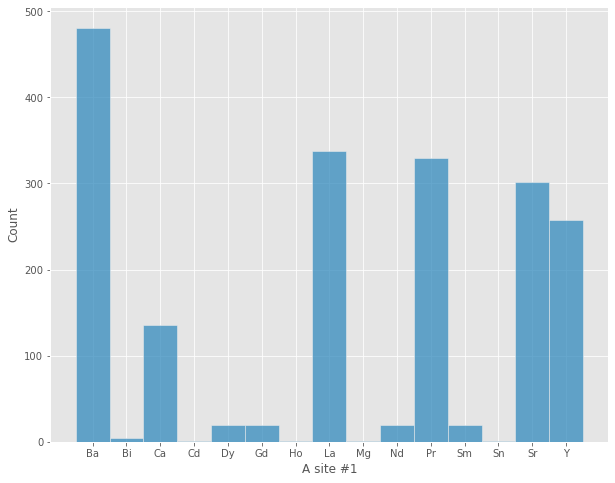

In [47]:
# Create a histogram by calling histplot() in Seaborn
sns.histplot(ts_csv_clean['A site #1'])

#### Bar Chart (Altair)

Altair is an open-source, declariative visualization library. You can learn more and find documentation on the [Altair website](https://altair-viz.github.io/index.html).

In [49]:
# Import the Altair library as alt (callable in our code as alt)
import altair as alt

ModuleNotFoundError: No module named 'altair'

In [ ]:
# Create an interactive Altair line chart of incidents per year
alt.Chart(wl_strikes).mark_line(point=True).encode(
    x='INCIDENT_YEAR',
    y='count(INCIDENT_YEAR)',
    tooltip = ['count(INCIDENT_YEAR)', 'INCIDENT_YEAR']
).interactive()